In [1]:
import sys
import os
# Import modules
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import multiprocessing as mp

In [17]:
%matplotlib inline

In [2]:
# My python scripts
home = os.getenv("HOME")
sys.path.insert(0, home+'/Ridge/UMDataModules/')
sys.path.insert(0, home+'/Ridge/Inputs/')
sys.path.insert(0, home+'/Ridge/PlotModules/')
sys.path.insert(0, home+'/Ridge/PredictionModules/')

from ImportData import *
from PredictionData import *
from plotmapfunction import *
import numpy as np
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from remove_ind import remove_ind
from SaveData import *
from remove_ind import *
import pickle
import multiprocessing as mp
import copy as cp
from Names import *

Import everything: including opening files, etc. 
Directory: /rds/general/user/lm2612/home/Ridge/Notebooks
Opening /work/lm2612/data/AvgData/All_input_Allfixed_5yr.nc ... 
Scenarios: ['No SO2 East Asia', 'No BC NHML', 'No SO2 NHML', 'No SO2 China', 'No SO2 US', 'No SO2 India', 'No SO2 Europe', 'No Dust Arabia', '2% Solar Constant increase', '3X CH4', '10X CFC-12', '10X Asia SO4', '2X CO2', '10X Asia BC', '10X BC', '10X Europe SO4', '5X SO4', 'pre-industrial SO4', 'No BC Global', '2xCO2 Global', 'No CO Global', 'No OC Global', 'No CH4 Global', 'No SO2 Global', 'No NOX Global', 'No VOC Global']
Done opening file 
(masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
               

/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
print(Names)

['No SO2 East Asia', 'No BC NHML', 'No SO2 NHML', 'No SO2 China', 'No SO2 US', 'No SO2 India', 'No SO2 Europe', 'No Dust Arabia', '2% Solar Constant increase', '3X CH4', '10X CFC-12', '10X Asia SO4', '2X CO2', '10X Asia BC', '10X BC', '10X Europe SO4', '5X SO4', 'pre-industrial SO4', 'No BC Global', '2xCO2 Global', 'No CO Global', 'No OC Global', 'No CH4 Global', 'No SO2 Global', 'No NOX Global', 'No VOC Global']


In [4]:
Noisy = ['No Dust Arabia','No VOC Global','No SO2 India','No OC Global','No NOX Global']
for runname in Noisy:
       (Names, [X_SfcTemp,X_GeoHeight500,X_RF,y]) = remove_ind(Names,runname,[X_SfcTemp,X_GeoHeight500,X_RF,y] )
print(Names)

['No SO2 East Asia', 'No BC NHML', 'No SO2 NHML', 'No SO2 China', 'No SO2 US', 'No SO2 Europe', '2% Solar Constant increase', '3X CH4', '10X CFC-12', '10X Asia SO4', '2X CO2', '10X Asia BC', '10X BC', '10X Europe SO4', '5X SO4', 'pre-industrial SO4', 'No BC Global', '2xCO2 Global', 'No CO Global', 'No CH4 Global', 'No SO2 Global']


In [5]:
# What is the predictor X?
X = X_SfcTemp
X_name = 'SfcTemp'

# Any dimension reduction (eg PCA) or full grid?
X_type = 'Full'
y_type = 'Full'


# alpha for regularisation, no of CV
alpha_list = np.logspace(-3,8,10)
no_of_cv = 5

# where to save?
savedir = home+'/WORK/RemoveNoiseNew/'
save_filename = 'X=SfcTemp_{},y={}_'.format(X_type,y_type)

# regions of interest for metrics?
from RegionLatitudes  import *
#regions_all = ['Global','Europe','US','China','East_Asia','India','NHML','Tropics','Africa','South_America','SHML','Arctic','Austrailia','NH','Tropics','SHML']
regions_all = ['Global']+RegionsList
d = PredictionData(X, y[:,20180], Names, lons, lats, lons1, lats1)
d.setup(X_type,y_type)

d.save_X()

In [6]:
%%time 
name = Names[0]
alpha_list = [0.01,0.1,0.5,1.0,2.0]
alpha_list = [1.]
alpha_list = [10.]
d.run(X_type, y_type, 'Ridge', name, cvfolds=no_of_cv, alpha_list=alpha_list, 
      repeat_regularise=False, coefs=True, normalize=False)

No SO2 East Asia
0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[10.0]
best params =  {'alpha': 10.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients
CPU times: user 642 ms, sys: 66.8 ms, total: 709 ms
Wall time: 59.1 ms


In [7]:
coef = d.coef.shape

In [8]:
print(d.coef.shape, 
      "\nTotal sum of coefficients:", np.sum(np.abs(d.coef)),
      "\nNon zero coefficients:", np.sum(d.coef!=0.))

(27840,) 
Total sum of coefficients: 4.938438391916202 
Non zero coefficients: 27840


In [9]:
lons = d.lons
lats = d.lats
nlon, nlat = len(lons),len(lats)

In [10]:
coef = d.coef[:].reshape((nlat,nlon))
coef.shape

(145, 192)

In [11]:
#coef[coef!=0.]

In [12]:
non_zero_lonlats = np.argwhere(coef!=0.)
non_zero_lats, non_zero_lons = non_zero_lonlats[:,0], non_zero_lonlats[:,1]
non_zero_lonlats = list(zip(lats[non_zero_lats], lons[non_zero_lons]))
#non_zero_lonlats

In [13]:
plt.figure(figsize=(10,5))
maxlvl = (np.max(np.abs(coef))*0.8)
levels = np.linspace(-maxlvl,maxlvl,10)
plotmap(lons, lats, coef, savefile=None, cmap="RdBu_r", levels=levels)
plt.show()

In [14]:
plt.figure(figsize=(10,5))
maxlvl = (np.max(np.abs(coef))*0.8)
levels = np.linspace(-maxlvl,maxlvl,10)
plotmap(lons, lats, coef, savefile=None, cmap="RdBu_r", levels=levels)
plt.show()

In [15]:
def coefficient_plot(j, i, name, reg_type='Ridge'):
    """j indexes the lat, i indexes the lon"""
    lat = lats[j]
    lon = lons[i]
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    point = np.zeros(lon_grid.shape)
    point[j, i] = 1.

    
    flattened_arr = point.flatten()
    sgl_index = np.argwhere(flattened_arr==1.)
    
    d = PredictionData(X, y[:,sgl_index].reshape(-1,1), Names, lons, lats, lons1, lats1)
    d.setup(X_type,y_type)
    d.save_X()
    
    if reg_type is 'Ridge':
        alpha_list = [0.01,0.1,0.5,1.0,2.0]
    elif reg_type is 'Lasso':
        alpha_list = [0.1,0.5,1.0,2.0]
    else:
        alpha_list = [0.1,0.5,1.0,2.0]


    d.run(X_type, y_type, reg_type, name, cvfolds=no_of_cv, alpha_list=alpha_list, 
      repeat_regularise=False, coefs=True, normalize=False)

    coef = d.coef[:].reshape((len(lats),len(lons)))
    coef.shape
    maxlvl = (np.max(np.abs(coef))*0.8)
    levels = np.linspace(-maxlvl,maxlvl,10)
    fig = plt.figure(figsize=(20,10))
    ax=fig.add_subplot(1, 2, 1)
    plotmap(lons, lats, coef, savefile=None, cmap="RdBu_r", levels=levels, plotaxis=ax)

    if lon>180.:
        lon = lon - 360.
    plt.plot(lon, lat, 'k*', markersize=14, alpha=0.6)
    plt.show()
    
    print("Longitude:", lon, "degrees", "\nLatitude: ", lat, "degrees")
    

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


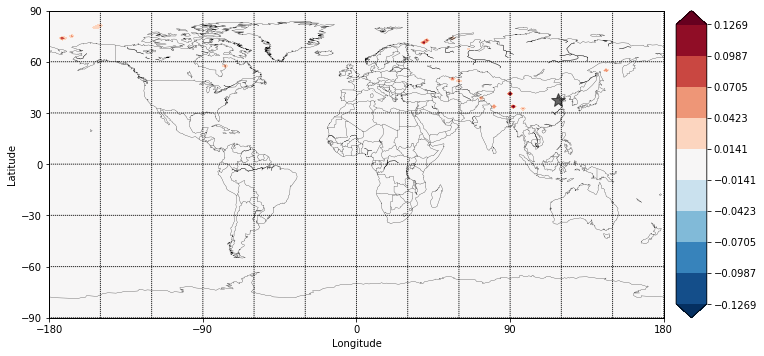

Longitude: 118.125 degrees 
Latitude:  37.5 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 2.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


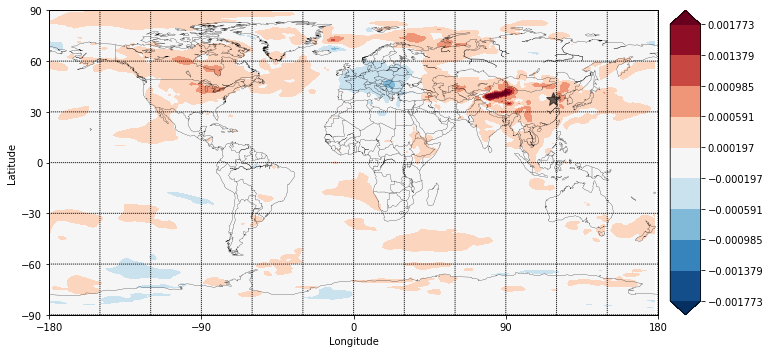

Longitude: 118.125 degrees 
Latitude:  37.5 degrees


In [18]:
coefficient_plot(102, 63, Names[17], 'Lasso')
coefficient_plot(102, 63, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]


/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


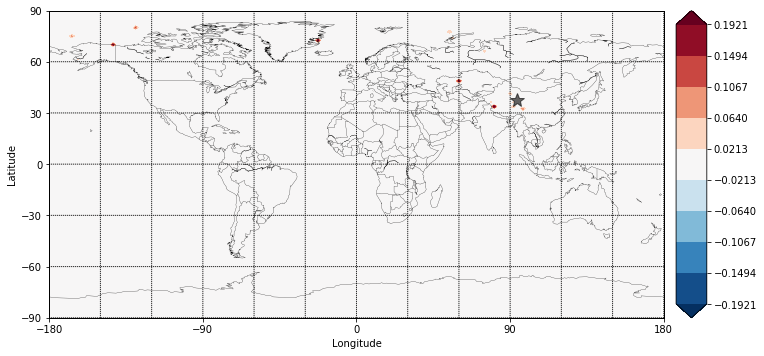

Longitude: 93.75 degrees 
Latitude:  37.5 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 2.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


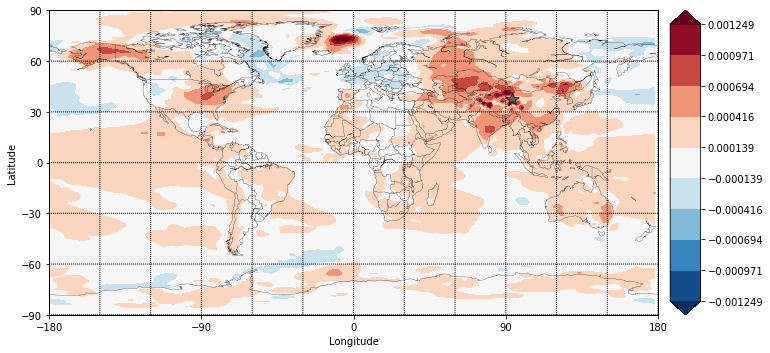

Longitude: 93.75 degrees 
Latitude:  37.5 degrees


In [30]:
coefficient_plot(102, 50, Names[17], 'Lasso')
coefficient_plot(102, 50, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


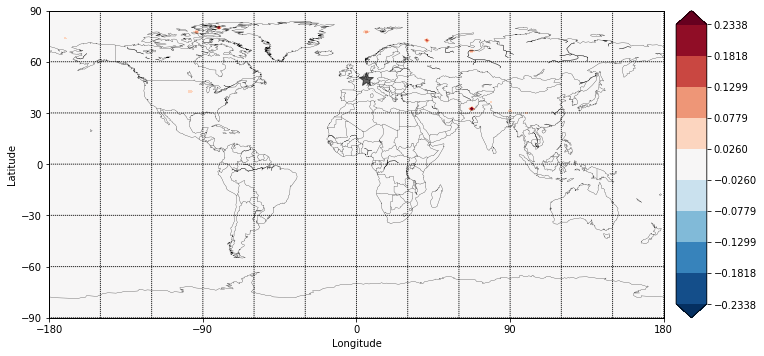

Longitude: 5.625 degrees 
Latitude:  50.0 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


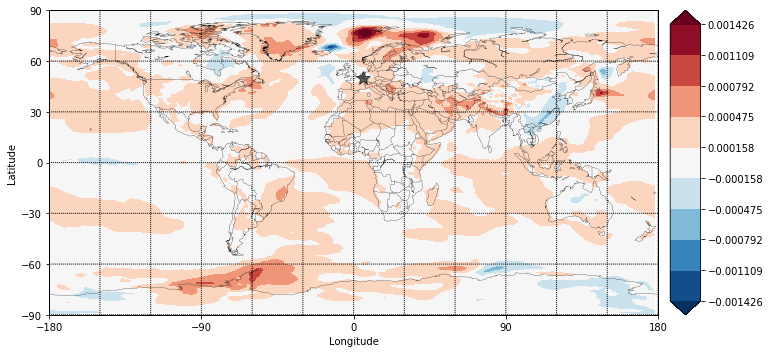

Longitude: 5.625 degrees 
Latitude:  50.0 degrees


In [29]:
coefficient_plot(112, 3, Names[17], 'Lasso')
coefficient_plot(112, 3, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]


/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


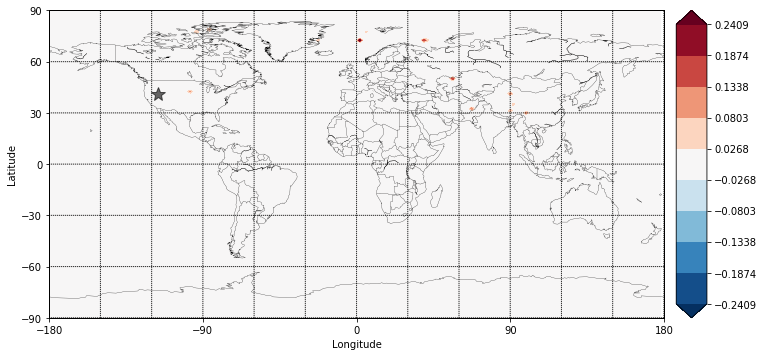

Longitude: -116.25 degrees 
Latitude:  41.25 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


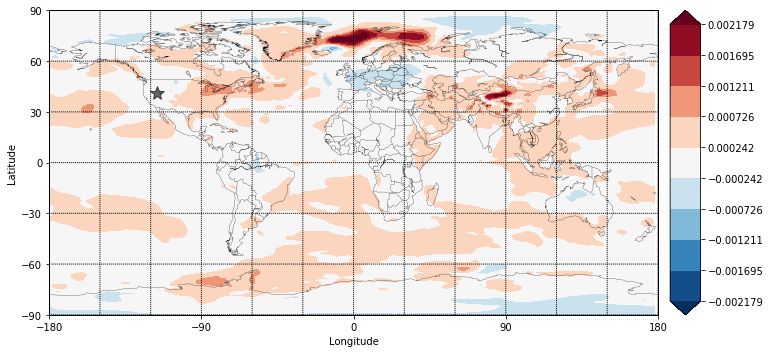

Longitude: -116.25 degrees 
Latitude:  41.25 degrees


In [25]:
coefficient_plot(105, 130, Names[17], 'Lasso')
coefficient_plot(105, 130, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


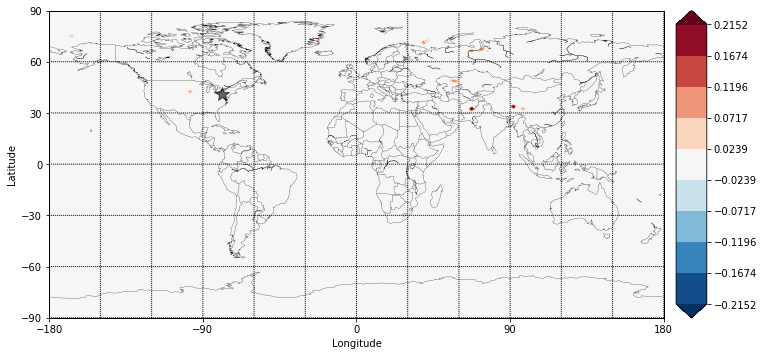

Longitude: -78.75 degrees 
Latitude:  41.25 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


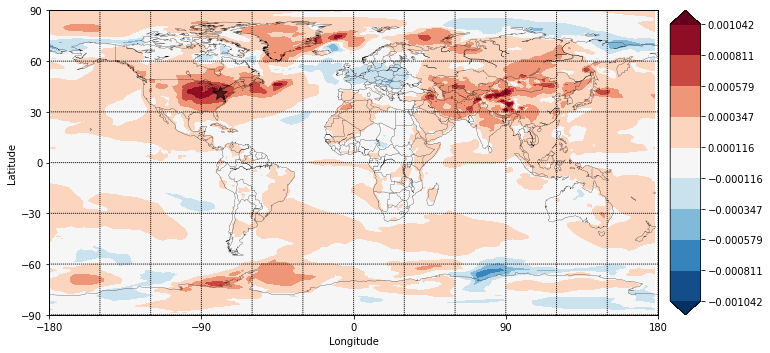

Longitude: -78.75 degrees 
Latitude:  41.25 degrees


In [26]:
coefficient_plot(105, 150, Names[17], 'Lasso')
coefficient_plot(105, 150, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.1, 0.5, 1.0, 2.0]


/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/lm2612/anaconda3/envs/GP/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: Converge

best params =  {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


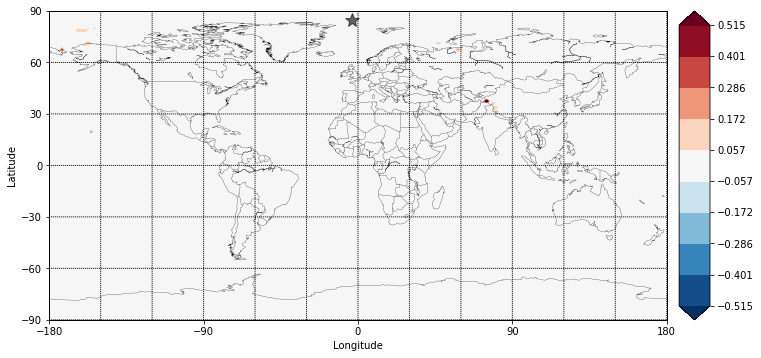

Longitude: -3.75 degrees 
Latitude:  85.0 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


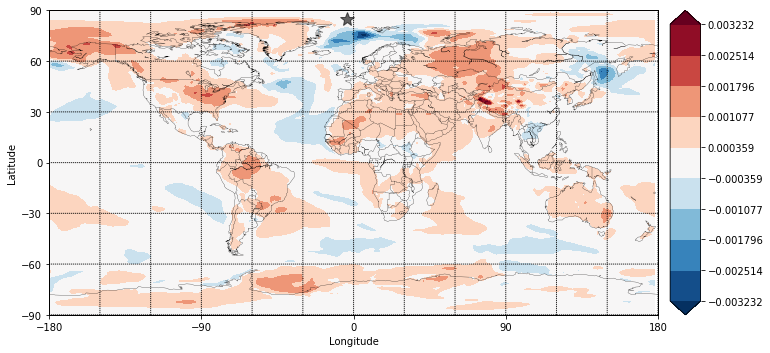

Longitude: -3.75 degrees 
Latitude:  85.0 degrees


In [22]:
coefficient_plot(140, 190, Names[17], 'Lasso')
coefficient_plot(140, 190, Names[17], 'Ridge')

2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 2.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


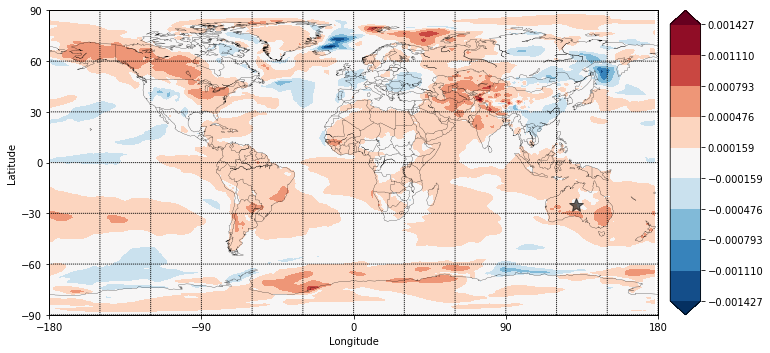

Longitude: 131.25 degrees 
Latitude:  -25.0 degrees
2xCO2 Global
17
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20]
predict
(27840,)
No repeated CV Regularisation
Return coefs? True
[0.01, 0.1, 0.5, 1.0, 2.0]
best params =  {'alpha': 2.0, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'tol': 0.0001}
Returning coefficients


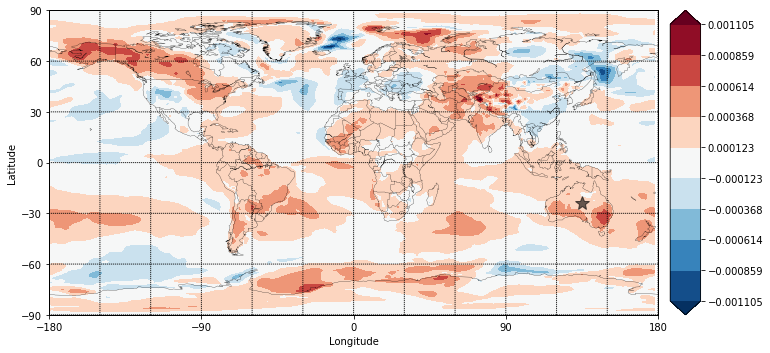

Longitude: 135.0 degrees 
Latitude:  -23.75 degrees


In [41]:
#coefficient_plot(40, 60, Names[17], 'Lasso')
coefficient_plot(52, 70, Names[17], 'Ridge')
coefficient_plot(53, 72, Names[17], 'Ridge')